<a href="https://colab.research.google.com/github/Aartizikre150/DAb300/blob/main/Lab_3_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group - 3**

1.  Andrews Truman - 824852
2.  Aarti Anil Zikre - 825897
3.  Premkumar Janakbhai Patel - 829257
4.  Vitthlesh Sheth - 825950

# Lab 3 Part 1: Convolutions in Keras
The code below will allow you to play with a single convolutional layer in Keras. Take a look at the documentation for the Conv2D layer, which is also where the original code came from.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

In [ ]:
input_shape = (4, 28, 28, 3)

x = tf.random.normal(input_shape)

y = Conv2D(filters=2,
           kernel_size=(3, 3),
           strides=1,
           padding='valid',
           input_shape=(None, 28, 28, 3))(x)
y.shape

TensorShape([4, 26, 26, 2])

Here is a brief explanation of the above code:


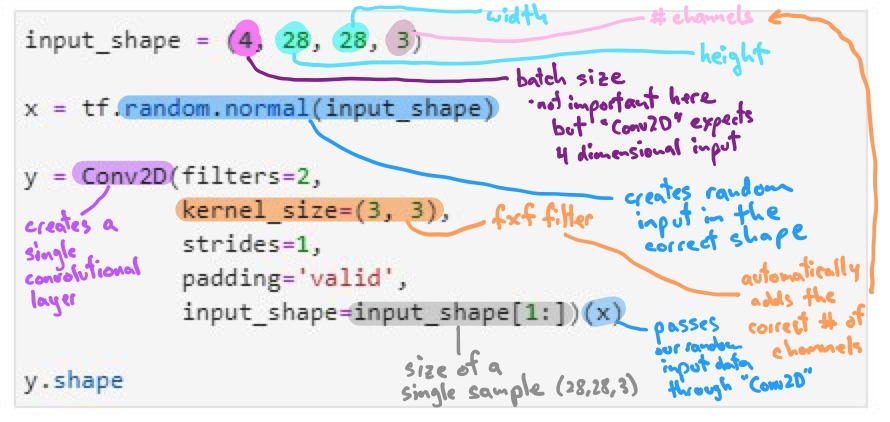

# Exercises
In the code above, make changes to:

- input  ℎ
- input  𝑤
- input  𝑛𝑐
- number of filters
- kernel size (same as filter size)

For each change, calculate the dimensions of the output (y.shape) by hand, including drawing a diagram (as shown below).



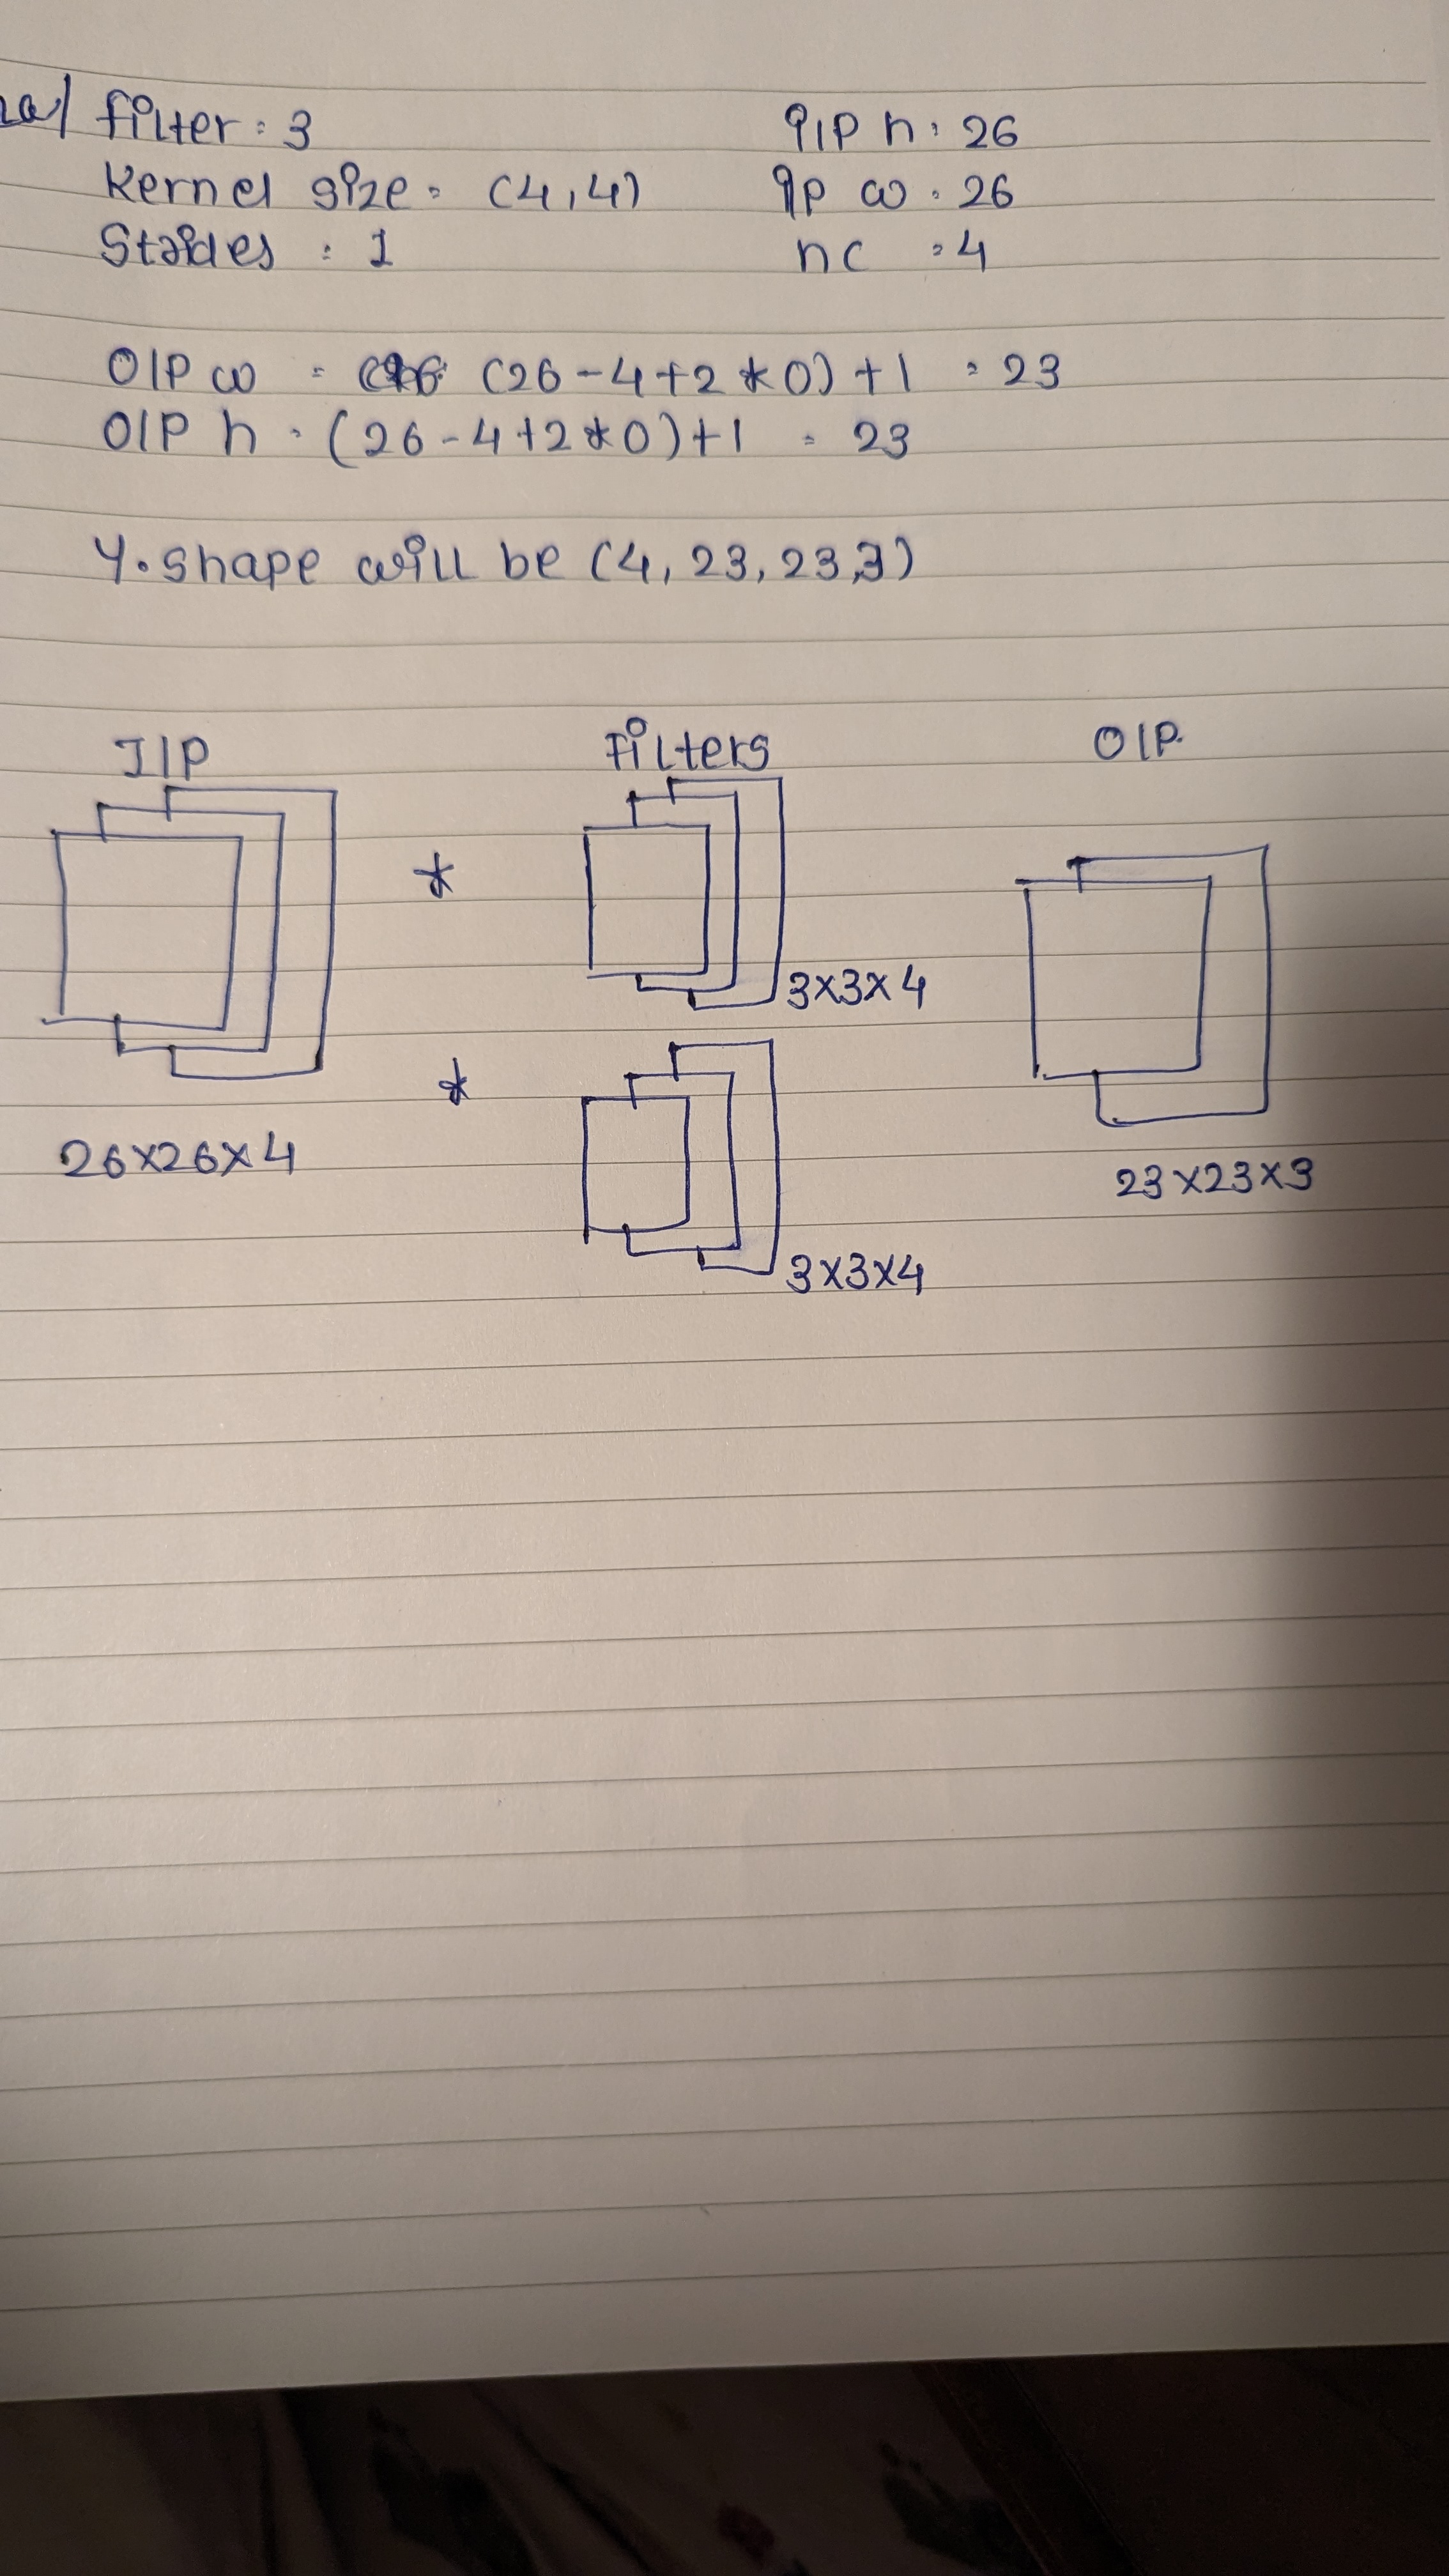

In [ ]:
input_shape = (4, 26, 26, 4)

x = tf.random.normal(input_shape)

y = Conv2D(filters=3,
           kernel_size=(4, 4),
           strides=1,
           padding='valid',
           input_shape=(None, 28, 28, 3))(x)
y.shape

TensorShape([4, 23, 23, 3])

## MNIST Revisited

Let's now revisit our MNIST. Knowing that the data contains 2-dimensional images of handwritten digits, we should be able to apply what we've learned about convolutions. Thus, in this section, we will create a convolutional neural network (CNN or convnet) for this data set.

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

This time we are going to use a **validation set** to monitor our training progress. We can also use this validation set for *hyperparameter tuning*. Remember, using the validation set allows us to keep the *test set* to gauge how well our final model should do in the real world; that is, the final model only sees the test data once.

In [ ]:
# Use the first 10,000 samples of our training data as our validation set
val_data = train_data[:10000]
val_labels = train_labels[:10000]

# Use the remainder of the original training data for actual training
partial_train_data = train_data[10000:]
partial_train_labels = train_labels[10000:]

In [ ]:
# Scale the pixel values so they lie in the range of 0-1
partial_train_data = partial_train_data / 255.
val_data = val_data / 255.

test_data = test_data /255.

Note that our data currently has 3 dimensions: `(samples, height, width)`.

In [ ]:
print(partial_train_data.shape)
print(val_data.shape)
print(test_data.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


In [ ]:
print(partial_train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

(50000,)
(10000,)
(10000,)


Our convolutional neural network will expect 4-dimensional data: `(batch_size, height, width, channels)`. Note that depending on how you decide to update the parameters of the network, `batch_size` could equal the number of `samples` (as in *batch gradient descent*), or it could equal a single sample (as in *stochastic gradient descent*, or it can equal the batch size (as in *mini-batch gradient descent*).

We can use a NumPy function to add this dimension.

In [ ]:
partial_train_data = np.expand_dims(partial_train_data, axis=3)
val_data = np.expand_dims(val_data, axis=3)
test_data = np.expand_dims(test_data, axis=3)

In [ ]:
print(partial_train_data.shape)
print(val_data.shape)
print(test_data.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


Note how a fourth dimension was added to our data. This dimension corresponds to the number of channels in our input data. Here it is 1, since the images are all greyscale. It would be 3 if the images were RGB. Also note, that the convention here is *channels last*, as opposed to *channels first*.

As in Lab 1, we need to convert our label data to the correct format.

In [ ]:
from tensorflow.keras.utils import to_categorical

partial_train_labels = to_categorical(partial_train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

In [ ]:
print(partial_train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)
(10000, 10)


We will now import the necessary modules for building our convolutional neural network. Since we are using Keras's sequential API we need to import the `Sequential` module. The remaining 3 imports will help us build the layers of our CNN. `Conv2D` creates the convolutional layers we have been discussing in the lectures. `Flatten` is used to create a 1 dimensional vector so we can feed the output of our convolutional layers to the fully-connected layers. We used NumPy's `reshape` function to do this flattening in Lab 1. And the `Dense` layer is the same as what we used in Lab 1.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

We are going to use a slightly different approach to building our network than we did in Lab 1. Here we will directly add a *list of layers* to the `Sequential()` object. That is, we put all our layers inside square brackets `[...]` and put this inside the `Sequential( [...] )` object to create our model. In Lab 1 we used the `.add()` method to add individual layers to our `Sequential()` object that we initialized without any layers.

In [ ]:
model = Sequential([
    Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=1,
           padding='same',
           activation='relu',
           input_shape=(28, 28, 1)),
    Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=2,
           padding='valid',
           activation='relu'),
    Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=1,
           padding='same',
          activation='relu'),
    Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=1,
           padding='valid',
           activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

It is often helpful to see the tensor shapes and number of parameters per layer. We can get this information by using the `.summary()` method.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 128)               991360    
                                                                 
 dense_1 (Dense)             (None, 10)                1

We are still tackling the same type of problem (multi-class classification) so the same loss and metrics will work for us here. The optimizer `rmsprop` is the same as we used before and can be taken as the default method (or recipe) to try out for updating the model parameters.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

We now fit our model to the remaining training data (the original training data minus the validation data). You will now see that *loss* and *accuracy* get updated for each batch of images (here set to 256) but the *validation loss* and *validation accuracy* get updated after each *epoch*. Note that the *validation data* is not being used to train the model. Each batch of the training data is used to update the parameters and then, once we have gone through all of the samples in our training data (that is, all the samples in `partial_train_data`) the model is used to make predictions for the validation set. From those predictions the validation loss and accuracy are calculated.

Each epoch of training should take 30-50s to complete.

In [ ]:
history = model.fit(partial_train_data,
                    partial_train_labels,
                    epochs=10,
                    batch_size=256,
                    validation_data=(val_data, val_labels),
                    verbose=1)

Epoch 1/10
196/196 [==============================] - 66s 329ms/step - loss: 0.2933 - accuracy: 0.9071 - val_loss: 0.2614 - val_accuracy: 0.9274
Epoch 2/10
196/196 [==============================] - 60s 305ms/step - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.0541 - val_accuracy: 0.9856
Epoch 3/10
196/196 [==============================] - 78s 396ms/step - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0559 - val_accuracy: 0.9858
Epoch 4/10
196/196 [==============================] - 72s 366ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0456 - val_accuracy: 0.9877
Epoch 5/10
196/196 [==============================] - 54s 277ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0565 - val_accuracy: 0.9858
Epoch 6/10
196/196 [==============================] - 53s 271ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0767 - val_accuracy: 0.9860
Epoch 7/10
196/196 [==============================] - 81s 413ms/step - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.0699 - val_ac

The values for the training loss and accuracy, as well as the validation loss and accuracy, are stored in the `history` variable. You can see the structure of the dictionary that stores this information as follows:

In [ ]:
history.history['loss']

[0.29328256845474243,
 0.05454198643565178,
 0.03235229477286339,
 0.02191563881933689,
 0.014023368246853352,
 0.010350840166211128,
 0.007432650774717331,
 0.005749651696532965,
 0.005659251008182764,
 0.003894826164469123]

In [ ]:
history.history['accuracy']

[0.9071000218391418,
 0.9829000234603882,
 0.9899799823760986,
 0.9928799867630005,
 0.9955999851226807,
 0.9966199994087219,
 0.9979199767112732,
 0.9980000257492065,
 0.9982399940490723,
 0.9987599849700928]

We will now use this information to visualize the progress our network makes on the loss and accuracy as the number of epochs increases.

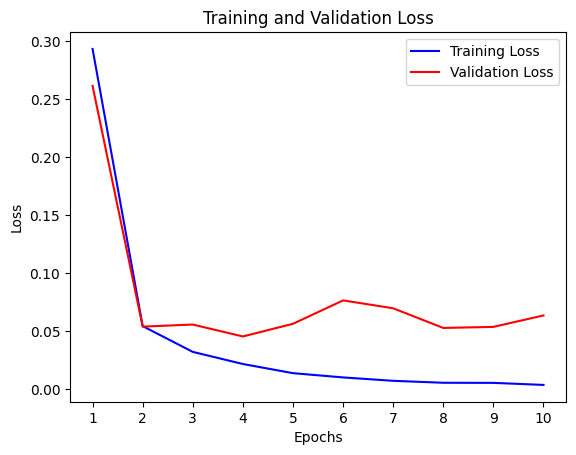

In [ ]:
import matplotlib.pyplot as plt  # needed to create our plot

history_dict = history.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

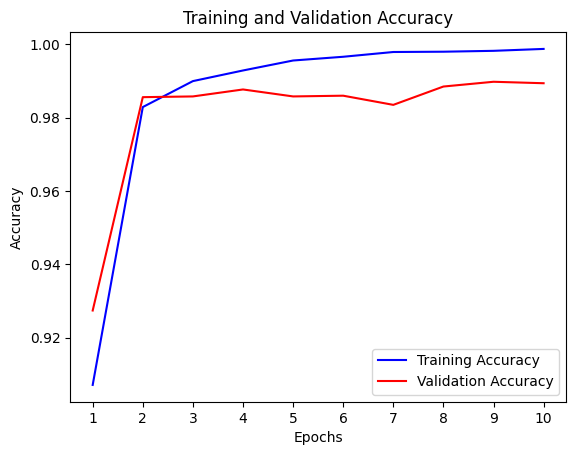

In [ ]:
# As above, but this time we want to visualize the training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Exercise: Change the layers

Play around with the **number of filters** and the **filter size** in our model. Note the change in:
- number of parameters in the model
- training and validation losses and accuracies

In [ ]:
# Changing the number of filters and filter size
model2 = Sequential([
    Conv2D(filters=16,
           kernel_size=(4, 4),
           strides=1,
           padding='same',
           activation='relu',
           input_shape=(28, 28, 1)),
    Conv2D(filters=16,
           kernel_size=(4, 4),
           strides=2,
           padding='valid',
           activation='relu'),
    Conv2D(filters=32,
           kernel_size=(4, 4),
           strides=1,
           padding='same',
          activation='relu'),
    Conv2D(filters=32,
           kernel_size=(4, 4),
           strides=1,
           padding='valid',
           activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        272       
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 16)        4112      
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 32)        8224      
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 32)        16416     
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               409728    
                                                                 
 dense_3 (Dense)             (None, 10)               

In [ ]:
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model2.fit(partial_train_data,
                    partial_train_labels,
                    epochs=10,
                    batch_size=256,
                    validation_data=(val_data, val_labels),
                    verbose=1)

Epoch 1/10
196/196 [==============================] - 59s 293ms/step - loss: 0.2811 - accuracy: 0.9112 - val_loss: 0.1102 - val_accuracy: 0.9674
Epoch 2/10
196/196 [==============================] - 69s 353ms/step - loss: 0.0593 - accuracy: 0.9816 - val_loss: 0.0631 - val_accuracy: 0.9820
Epoch 3/10
196/196 [==============================] - 63s 323ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0684 - val_accuracy: 0.9783
Epoch 4/10
196/196 [==============================] - 64s 326ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0662 - val_accuracy: 0.9795
Epoch 5/10
196/196 [==============================] - 70s 356ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0562 - val_accuracy: 0.9856
Epoch 6/10
196/196 [==============================] - 70s 357ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0536 - val_accuracy: 0.9842
Epoch 7/10
196/196 [==============================] - 59s 299ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0595 - val_ac

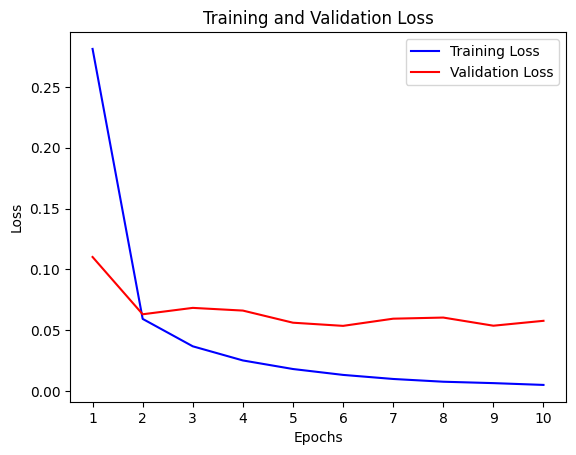

In [ ]:
import matplotlib.pyplot as plt  # needed to create our plot

history_dict = history.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

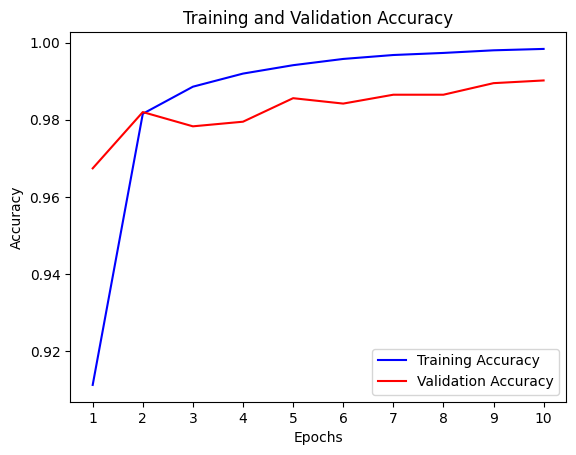

In [ ]:
# As above, but this time we want to visualize the training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Exercise: Early Stopping

When you have a final model, train it until the validation loss stops decreasing. At this point, the model will have stopped learning and will start to memorize the training data. The model may be starting to overfit. Note the number of epochs at which this happens.  One way to avoid this overfitting is called *early stopping*.  

Try implementing early stopping for our model:
- use the validation loss plot to determine which epoch corresponds to when the model stops learning
    - if it so happens that the validation loss continues going down for all 10 epochs, then increase the number of epochs in the original code to 20
- use the complete training set (no validation set)
- scale this training set
- expand its dimensions to 4
- use the same model, and same optimizer, loss and metrics
- fit the model to the complete training set (no validation set)
- evaluate the trained model on the test data


In [ ]:
# importing the libraries for early stopping
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [ ]:
# Normalizing the values
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# This code defines a Sequential model in Keras with a single convolutional layer containing 32 filters of size 3x3, ReLU activation, and an input shape of 28x28x1, followed by a Flatten layer to prepare the data for a dense layer or output.
model3 = Sequential([Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)),
                    Flatten(),
                    Dense(128, activation = 'relu'),
                    Dense(10, activation = 'softmax')])

In [ ]:
model3.compile(optimizer=Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# This code initializes an EarlyStopping callback in Keras. It monitors the training loss, waits for 5 consecutive epochs of no improvement, and restores the best weights when training is stopped.
early_stopping = EarlyStopping(monitor = 'loss', patience = 5, restore_best_weights = True)
history = model3.fit(x_train, y_train, epochs = 20, batch_size = 64, callbacks = [early_stopping])

Epoch 1/20
938/938 [==============================] - 69s 73ms/step - loss: 0.1561 - accuracy: 0.9533
Epoch 2/20
938/938 [==============================] - 79s 84ms/step - loss: 0.0478 - accuracy: 0.9851
Epoch 3/20
938/938 [==============================] - 68s 72ms/step - loss: 0.0237 - accuracy: 0.9928
Epoch 4/20
938/938 [==============================] - 74s 78ms/step - loss: 0.0156 - accuracy: 0.9950
Epoch 5/20
938/938 [==============================] - 80s 85ms/step - loss: 0.0117 - accuracy: 0.9962
Epoch 6/20
938/938 [==============================] - 78s 83ms/step - loss: 0.0089 - accuracy: 0.9969
Epoch 7/20
938/938 [==============================] - 76s 81ms/step - loss: 0.0053 - accuracy: 0.9985
Epoch 8/20
938/938 [==============================] - 78s 83ms/step - loss: 0.0055 - accuracy: 0.9981
Epoch 9/20
938/938 [==============================] - 80s 85ms/step - loss: 0.0044 - accuracy: 0.9985
Epoch 10/20
938/938 [==============================] - 76s 81ms/step - loss: 0.004

In [ ]:
test_loss, test_accuracy = model3.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.1009 - accuracy: 0.9834
Test Accuracy: 0.9833999872207642


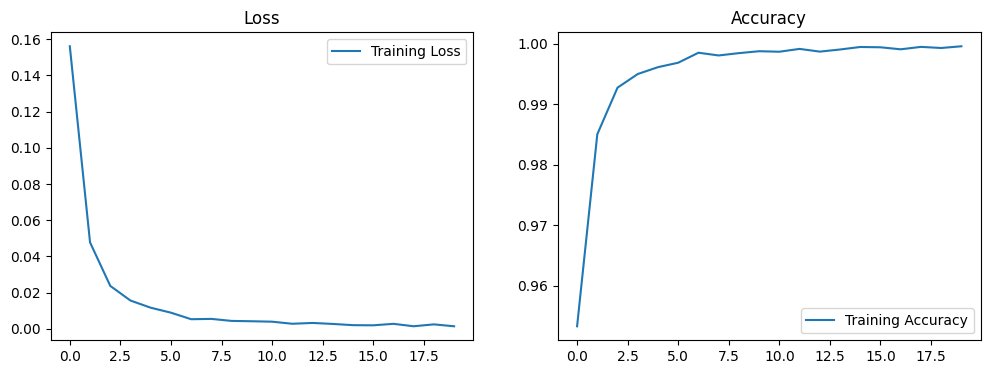

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
#plt.xlabel('Epoch')
plt.legend()

# Plot the training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
#plt.xlabel('Epoch')
plt.legend()

plt.show()

### Exercise: Early Stopping with Callbacks

Now try to implement early stopping using the Keras [callback](https://keras.io/api/callbacks/early_stopping/) functionality. In this case, you will need to use the validation data, because you want the early stopping to occur as a result of Keras monitoring the validation loss.

In [ ]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()
# Normalizing the values
x_train = x_train/255.0
x_test = x_test/255.0

# This code defines a Sequential model in Keras with a single convolutional layer containing 32 filters of size 3x3, ReLU activation, and an input shape of 28x28x1, followed by a Flatten layer to prepare the data for a dense layer or output.
model4 = Sequential([Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)),
                    Flatten(),
                    Dense(128, activation = 'relu'),
                    Dense(10, activation = 'softmax')]) #
model4.compile(optimizer=Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# This code initializes an EarlyStopping callback in Keras. It monitors the training loss, waits for 5 consecutive epochs of no improvement, and restores the best weights when training is stopped.
early_stopping = EarlyStopping(monitor = 'loss', patience = 5, restore_best_weights = True)
history = model4.fit(x_train, y_train, epochs = 20, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/20
1500/1500 [==============================] - 94s 62ms/step - loss: 0.1576 - accuracy: 0.9524 - val_loss: 0.0786 - val_accuracy: 0.9757
Epoch 2/20
1500/1500 [==============================] - 101s 68ms/step - loss: 0.0492 - accuracy: 0.9850 - val_loss: 0.0669 - val_accuracy: 0.9809
Epoch 3/20
1500/1500 [==============================] - 95s 63ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0605 - val_accuracy: 0.9824
Epoch 4/20
1500/1500 [==============================] - 98s 66ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.0733 - val_accuracy: 0.9808
Epoch 5/20
1500/1500 [==============================] - 104s 69ms/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.0777 - val_accuracy: 0.9819
Epoch 6/20
1500/1500 [==============================] - 99s 66ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.0794 - val_accuracy: 0.9820
Epoch 7/20
1500/1500 [==============================] - 107s 71ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.088

In [ ]:
test_loss, test_accuracy = model4.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.1074 - accuracy: 0.9833
Test Accuracy: 0.983299970626831


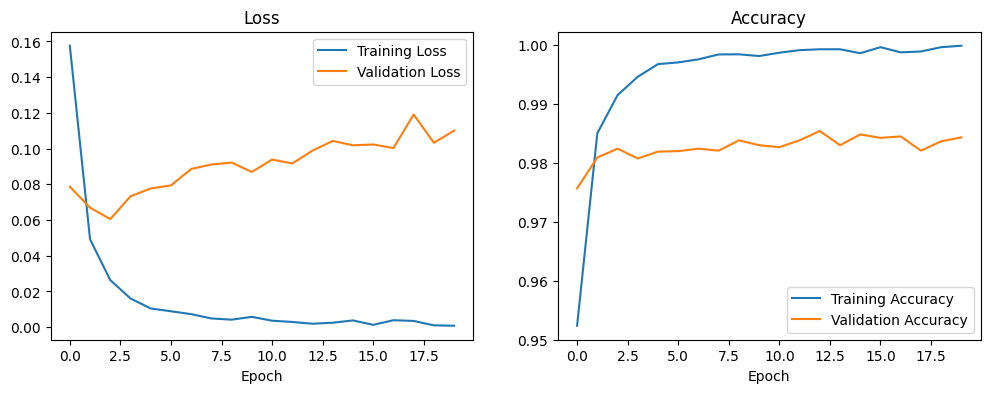

In [ ]:
# Plot the training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot the training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()